In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import pickle

# model libs
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Evaluate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load benign feature vector

# Training datast

In [47]:
# path dataset
dataset_path = '/home/kali/Malware_project/Dataset'

In [48]:
# list tất cả path của file trong thư mục
df_benign = pd.DataFrame(data=None)
all_samples = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f))] #list comprehension
for samples in all_samples:
  if "lsi_benign" in samples:
    file_path = join(dataset_path, samples)
    print(file_path)
    temp = pd.read_csv(file_path, header=None)
    df_benign = pd.concat([df_benign, temp], ignore_index=True)

/home/kali/Malware_project/Dataset/lsi_benign_14.csv
/home/kali/Malware_project/Dataset/lsi_benign_20.csv
/home/kali/Malware_project/Dataset/lsi_benign_15.csv
/home/kali/Malware_project/Dataset/lsi_benign_10.csv
/home/kali/Malware_project/Dataset/lsi_benign_11.csv
/home/kali/Malware_project/Dataset/lsi_benign_19.csv
/home/kali/Malware_project/Dataset/lsi_benign_12.csv
/home/kali/Malware_project/Dataset/lsi_benign_1.csv
/home/kali/Malware_project/Dataset/lsi_benign_6.csv
/home/kali/Malware_project/Dataset/lsi_benign_16.csv
/home/kali/Malware_project/Dataset/lsi_benign_5.csv
/home/kali/Malware_project/Dataset/lsi_benign_2.csv
/home/kali/Malware_project/Dataset/lsi_benign_7.csv
/home/kali/Malware_project/Dataset/lsi_benign_3.csv
/home/kali/Malware_project/Dataset/lsi_benign_18.csv
/home/kali/Malware_project/Dataset/lsi_benign_13.csv
/home/kali/Malware_project/Dataset/lsi_benign_4.csv
/home/kali/Malware_project/Dataset/lsi_benign_8.csv
/home/kali/Malware_project/Dataset/lsi_benign_17.csv
/

In [49]:
df_benign.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.091680,-0.005865,0.153073,-0.067141,0.009649,-0.018244,0.005989,-0.000094,0.005829,-0.000013,...,0.015007,0.046704,0.002286,-0.014693,-0.021308,-0.046825,0.019660,0.030328,0.017648,-0.013970
1,0.048826,-0.214345,-0.014904,-0.008417,0.043947,0.007412,-0.039504,0.278971,0.121019,-0.028439,...,0.008640,0.129105,-0.086167,-0.068405,-0.048433,0.026620,0.013323,-0.033524,0.012347,-0.081173
2,0.005172,-0.014037,-0.002322,-0.000034,0.007670,0.005593,0.006045,-0.005612,0.011061,0.012345,...,-0.001824,-0.001190,0.003497,-0.005465,0.000567,0.000521,0.002344,-0.001470,-0.003655,0.001362
3,0.010124,-0.028153,0.001753,0.000357,0.001357,0.007689,-0.006469,0.009839,0.070472,-0.022865,...,-0.001242,0.021475,0.008988,-0.013042,0.015404,0.001467,0.010473,-0.003077,0.001060,-0.001299
4,0.171415,-0.007185,-0.000400,-0.004167,-0.017593,-0.012833,-0.033707,0.046123,0.164728,-0.065527,...,-0.017636,0.004695,-0.016584,-0.012938,0.046596,0.066994,-0.032784,-0.008846,0.069831,-0.005891


In [50]:
df_benign.shape

(6000, 200)

In [51]:
df_benign["label"] = 0

In [52]:
df_benign.shape

(6000, 201)

In [53]:
df_benign.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.091680,-0.005865,0.153073,-0.067141,0.009649,-0.018244,0.005989,-0.000094,0.005829,-0.000013,...,0.046704,0.002286,-0.014693,-0.021308,-0.046825,0.019660,0.030328,0.017648,-0.013970,0
1,0.048826,-0.214345,-0.014904,-0.008417,0.043947,0.007412,-0.039504,0.278971,0.121019,-0.028439,...,0.129105,-0.086167,-0.068405,-0.048433,0.026620,0.013323,-0.033524,0.012347,-0.081173,0
2,0.005172,-0.014037,-0.002322,-0.000034,0.007670,0.005593,0.006045,-0.005612,0.011061,0.012345,...,-0.001190,0.003497,-0.005465,0.000567,0.000521,0.002344,-0.001470,-0.003655,0.001362,0
3,0.010124,-0.028153,0.001753,0.000357,0.001357,0.007689,-0.006469,0.009839,0.070472,-0.022865,...,0.021475,0.008988,-0.013042,0.015404,0.001467,0.010473,-0.003077,0.001060,-0.001299,0
4,0.171415,-0.007185,-0.000400,-0.004167,-0.017593,-0.012833,-0.033707,0.046123,0.164728,-0.065527,...,0.004695,-0.016584,-0.012938,0.046596,0.066994,-0.032784,-0.008846,0.069831,-0.005891,0


# Load malware

In [54]:
# list tất cả path của file trong thư mục
df_malware = pd.DataFrame(data=None)
all_samples = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f))] #list comprehension
for samples in all_samples:
  if "lsi_malware" in samples:
    file_path = join(dataset_path, samples)
    print(file_path)
    temp = pd.read_csv(file_path, header=None)
    df_malware = pd.concat([df_malware, temp], ignore_index=True)

/home/kali/Malware_project/Dataset/lsi_malware_9.csv
/home/kali/Malware_project/Dataset/lsi_malware_1.csv
/home/kali/Malware_project/Dataset/lsi_malware_4.csv
/home/kali/Malware_project/Dataset/lsi_malware_15.csv
/home/kali/Malware_project/Dataset/lsi_malware_18.csv
/home/kali/Malware_project/Dataset/lsi_malware_6.csv
/home/kali/Malware_project/Dataset/lsi_malware_7.csv
/home/kali/Malware_project/Dataset/lsi_malware_12.csv
/home/kali/Malware_project/Dataset/lsi_malware_20.csv
/home/kali/Malware_project/Dataset/lsi_malware_19.csv
/home/kali/Malware_project/Dataset/lsi_malware_10.csv
/home/kali/Malware_project/Dataset/lsi_malware_16.csv
/home/kali/Malware_project/Dataset/lsi_malware_3.csv
/home/kali/Malware_project/Dataset/lsi_malware_2.csv
/home/kali/Malware_project/Dataset/lsi_malware_13.csv
/home/kali/Malware_project/Dataset/lsi_malware_17.csv
/home/kali/Malware_project/Dataset/lsi_malware_11.csv
/home/kali/Malware_project/Dataset/lsi_malware_8.csv
/home/kali/Malware_project/Dataset/l

In [55]:
df_malware.shape

(6000, 200)

In [56]:
df_malware["label"] = 1

# Test dataset

# Benign testset

In [57]:
# Path test dataset
testset_path = '/home/kali/Malware_project/Dataset_test'

In [58]:
# Load testset
df_test_ben = pd.DataFrame(data=None)
all_samples = [f for f in listdir(testset_path) if isfile(join(testset_path, f))] #list comprehension
for samples in all_samples:
  if "ben_test" in samples:
    file_path = join(testset_path, samples)
    print(file_path)
    temp = pd.read_csv(file_path, header=None)
    df_test_ben = pd.concat([df_test_ben, temp], ignore_index=True)

/home/kali/Malware_project/Dataset_test/ben_test_5.csv
/home/kali/Malware_project/Dataset_test/ben_test_7.csv
/home/kali/Malware_project/Dataset_test/ben_test_3.csv
/home/kali/Malware_project/Dataset_test/ben_test_4.csv
/home/kali/Malware_project/Dataset_test/ben_test_9.csv
/home/kali/Malware_project/Dataset_test/ben_test_1.csv
/home/kali/Malware_project/Dataset_test/ben_test_10.csv
/home/kali/Malware_project/Dataset_test/ben_test_6.csv
/home/kali/Malware_project/Dataset_test/ben_test_2.csv
/home/kali/Malware_project/Dataset_test/ben_test_8.csv


In [59]:
df_test_ben.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.700003,0.102434,-0.093520,-0.027042,0.020155,-0.047592,-0.017276,-0.070254,0.005620,-0.028636,...,0.011059,-0.003913,-0.009662,-0.005125,0.022099,-0.004272,0.014570,0.002425,-0.025634,-0.000250
1,-0.010860,-0.039676,-0.000785,0.014321,-0.003672,0.007140,0.024660,-0.005463,0.000405,0.009214,...,0.030430,0.027212,-0.021359,0.049001,-0.001038,-0.029714,0.013906,0.026232,-0.044486,0.050911
2,-0.033071,-0.197338,-0.018466,0.000548,-0.088503,-0.014351,-0.110523,0.014459,-0.017695,0.079376,...,0.035897,0.003296,-0.021067,-0.013967,0.019160,-0.012829,0.040295,0.057489,-0.030094,0.002840
3,-0.026195,-0.226741,-0.024409,-0.033354,0.125504,0.006179,0.047934,0.026085,-0.137685,-0.054920,...,0.012556,0.016063,-0.018297,-0.008691,0.011260,0.078084,-0.043046,-0.035982,0.006377,-0.041237
4,-0.026448,-0.104101,0.035971,0.389314,0.049826,-0.004921,-0.016077,0.003765,-0.049416,0.011134,...,-0.030774,-0.019270,0.004539,0.023284,0.007512,-0.047825,-0.034919,0.015344,-0.023480,0.004918


In [60]:
df_test_ben.shape

(4000, 200)

In [61]:
df_test_ben["label"] = 0

In [62]:
df_test_ben.shape

(4000, 201)

# Malware testset

In [63]:
# list tất cả path của file trong thư mục
df_test_malware = pd.DataFrame(data=None)
all_samples = [f for f in listdir(testset_path) if isfile(join(testset_path, f))] #list comprehension
for samples in all_samples:
  if "mal_test" in samples:
    file_path = join(testset_path, samples)
    print(file_path)
    temp = pd.read_csv(file_path, header=None)
    df_test_malware = pd.concat([df_test_malware, temp], ignore_index=True)

/home/kali/Malware_project/Dataset_test/mal_test_5.csv
/home/kali/Malware_project/Dataset_test/mal_test_6.csv
/home/kali/Malware_project/Dataset_test/mal_test_4.csv
/home/kali/Malware_project/Dataset_test/mal_test_7.csv
/home/kali/Malware_project/Dataset_test/mal_test_8.csv
/home/kali/Malware_project/Dataset_test/mal_test_10.csv
/home/kali/Malware_project/Dataset_test/mal_test_9.csv
/home/kali/Malware_project/Dataset_test/mal_test_3.csv
/home/kali/Malware_project/Dataset_test/mal_test_1.csv
/home/kali/Malware_project/Dataset_test/mal_test_2.csv


In [64]:
df_test_malware["label"] = 1

In [65]:
df_test_malware.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,-0.014094,-0.000932,-0.000415,0.024749,0.000108,-0.042745,0.014081,0.008137,-0.013268,0.017560,...,0.005694,0.009654,-0.005996,0.000762,0.007145,0.001203,-0.002884,0.000677,-0.002063,1
1,-0.085172,-0.009231,-0.000618,0.119856,-0.001564,-0.081603,-0.013072,0.005801,-0.033154,-0.035338,...,-0.067726,-0.051095,0.022563,-0.016510,-0.088171,0.038469,0.047520,-0.001106,0.006261,1
2,-0.085078,-0.009227,-0.000527,0.118251,-0.000646,-0.076094,-0.009530,0.003969,-0.029264,-0.027751,...,0.025675,-0.034648,-0.033353,0.031731,0.023941,0.052449,0.020223,-0.049830,0.021802,1
3,-0.015171,0.029791,-0.000913,0.013582,-0.039909,-0.010248,0.019267,0.015777,0.003248,0.009218,...,-0.000011,-0.001333,0.000263,-0.000866,0.001001,-0.000419,-0.000497,-0.000470,-0.001322,1
4,-0.014483,0.006692,-0.999729,-0.013716,-0.000760,0.002370,-0.003305,0.000146,-0.000011,-0.000512,...,0.000056,-0.000055,0.000293,0.000131,-0.000024,0.000188,0.000020,0.000152,0.000144,1


In [66]:
df_test_malware.shape

(4000, 201)

# Concatenate datasets

# Training

In [67]:
X_train = pd.concat([df_benign, df_malware])

In [68]:
# Check NaN values and replace it if true
checkNaN = X_train.isnull().values.any
if checkNaN:
    X_train = X_train[:].replace(np.nan, 0)
    print("Sucessfully replace NaN values")
else:
    print("No NaN values")

Sucessfully replace NaN values


In [69]:
# Get label
y_train = X_train.iloc[:, -1]

# Remove label column
X_train = X_train.iloc[:, :-1]

# Test

In [70]:
X_test = pd.concat([df_test_ben, df_test_malware])

In [71]:
# Check NaN values and replace it if true
checkNaN = X_test.isnull().values.any
if checkNaN:
    X_test = X_test[:].replace(np.nan, 0)
    print("Sucessfully replace NaN values")
else:
    print("No NaN values")

Sucessfully replace NaN values


In [72]:
# Get label
y_test = X_test.iloc[:, -1]

# Remove label column
X_test = X_test.iloc[:, :-1]

# Evaluate function

In [73]:
# define evaluation function
def evaluation(y_test, y_pred):
  print('Misclassified samples: %d' % (y_test != y_pred).sum())
  result = confusion_matrix(y_test, y_pred, normalize='true')
  #print("Confusion Matrix:")
  #print(result)
  sns.heatmap(result, annot=True)
  result1 = classification_report(y_test, y_pred)
  print("Classification Report:",)
  print (result1)
  result2 = 100* accuracy_score(y_test, y_pred)
  print("Accuracy:", result2)
  result3 = precision_score(y_test, y_pred, average='weighted')
  print("Precision:",result3)
  result4 = recall_score(y_test, y_pred, average='weighted')
  print("Recall:",result4)
  result5 = f1_score(y_test, y_pred, average='weighted')
  print("F1:",result5)

# Building Classifiers

## SVM

In [74]:
# Define model
SVM = SVC(kernel='rbf',C=100,gamma=0.01)

## RF

In [75]:
# Define model
RF = RandomForestClassifier(n_estimators=442, n_jobs=32, max_depth=3)

## MLP

In [76]:
# Define model
MLP = MLPClassifier(solver='adam', max_iter=40, random_state=1)

## XGBoost

In [77]:
# Model
XGB = XGBClassifier(min_child_weight = 5, subsample = 0.8, colsample_bytree = 0.6)

# Train model

In [78]:
# SVM
SVM.fit(X_train, y_train)

SVC(C=100, gamma=0.01)

In [79]:
# RF
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=442, n_jobs=32)

In [80]:
# MLP
MLP.fit(X_train, y_train)

/home/kali/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=40, random_state=1)

In [81]:
# XGBoost
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Test model

In [82]:
# SVM
predict_svm = SVM.predict(X_test)

In [83]:
# RF
predict_rf = RF.predict(X_test)

In [84]:
# MLP
predict_mlp = MLP.predict(X_test)

In [85]:
# XGB
predict_xgb = XGB.predict(X_test)

# Predict and evaluate

Misclassified samples: 4220
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.28      0.35      4000
           1       0.48      0.66      0.56      4000

    accuracy                           0.47      8000
   macro avg       0.47      0.47      0.45      8000
weighted avg       0.47      0.47      0.45      8000

Accuracy: 47.25
Precision: 0.468
Recall: 0.4725
F1: 0.45327935222672067


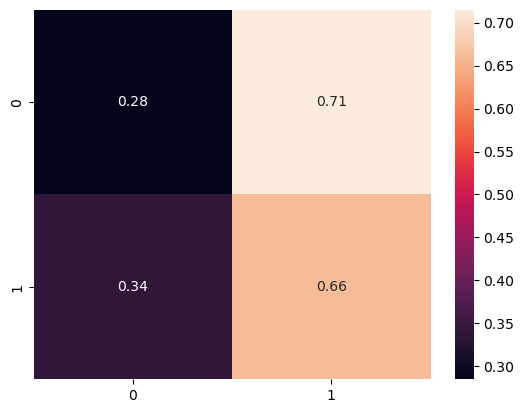

In [86]:
# SVM
evaluation(y_test, predict_svm)

Misclassified samples: 2692
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.81      0.71      4000
           1       0.73      0.52      0.60      4000

    accuracy                           0.66      8000
   macro avg       0.68      0.66      0.66      8000
weighted avg       0.68      0.66      0.66      8000

Accuracy: 66.35
Precision: 0.6793174093624526
Recall: 0.6635
F1: 0.6559120873277738


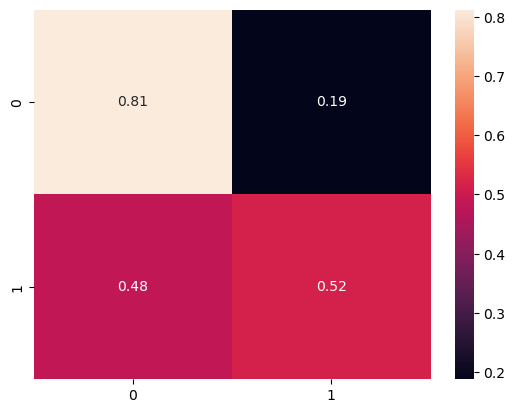

In [94]:
# RF
evaluation(y_test, predict_rf)

Misclassified samples: 3580
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.48      0.52      4000
           1       0.55      0.63      0.58      4000

    accuracy                           0.55      8000
   macro avg       0.55      0.55      0.55      8000
weighted avg       0.55      0.55      0.55      8000

Accuracy: 55.25
Precision: 0.5537249833452552
Recall: 0.5525
F1: 0.549934514214652


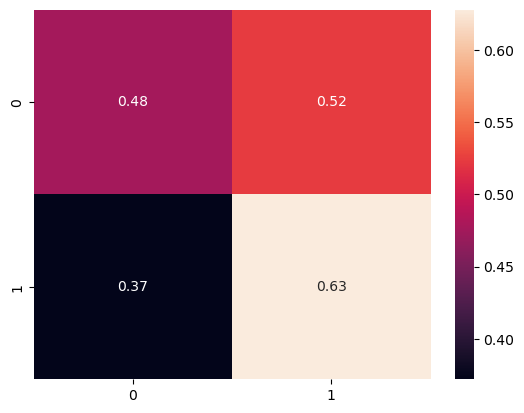

In [95]:
# MLP
evaluation(y_test, predict_mlp)

Misclassified samples: 3827
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.99      0.68      4000
           1       0.90      0.05      0.09      4000

    accuracy                           0.52      8000
   macro avg       0.70      0.52      0.38      8000
weighted avg       0.70      0.52      0.38      8000

Accuracy: 52.1625
Precision: 0.7048657389288128
Recall: 0.521625
F1: 0.3838464280289821


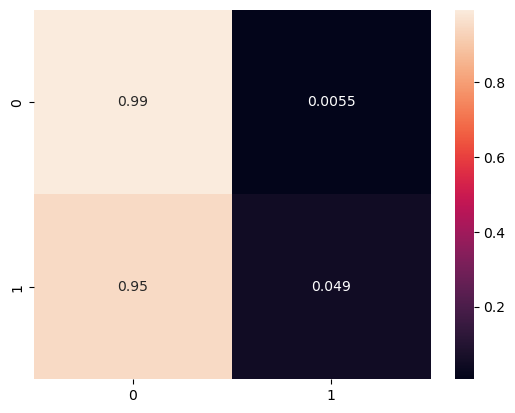

In [96]:
# XGBoost
evaluation(y_test, predict_xgb)